<a href="https://colab.research.google.com/github/osamahameedX/DS14_Codes/blob/master/Sentiment_Analysis_of_Reviews_using_Machine_Learning_Algorithms_on_Textual_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ufrom google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import History 

import tensorflow as tf
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

from wordcloud import WordCloud, STOPWORDS


import sklearn.metrics as metrics
import nltk
from sklearn.pipeline import Pipeline
import regex as re

from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import sentiwordnet as swn, wordnet
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk.stem.wordnet import WordNetLemmatizer 
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import warnings
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = stopwords.words('english')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
positive = pd.read_csv('gdrive/My Drive/posReview.csv')
print(positive.shape)
positive.head()

(21972, 2)


Review  label
0  good looking kicks if your kickin it old schoo...      1
1  these sunglasses are all right. they were a li...      1
2  i don't see the difference between these bodys...      1
3  very nice basic clothing.  i think the size is...      1
4  i love these socks. they fit great (my 15 mont...      1

In [ ]:
negative = pd.read_csv('gdrive/My Drive/negReview.csv')
print(negative.shape)
negative.head()

(16576, 2)


Review  label
0  i bought 3 sets of these blades for my cars. t...      0
1  i bought two pair in different sizes and one p...      0
2  lasts only 2 weeks! try them if you don't beli...      0
3  what a bad product!  they didn't last two week...      0
4  i bought 3 sets of these blades for my cars. t...      0

In [ ]:
df = pd.concat([positive, negative]).reset_index(drop=True)
print(df.shape)
df.head()

(38548, 2)


Review  label
0  good looking kicks if your kickin it old schoo...      1
1  these sunglasses are all right. they were a li...      1
2  i don't see the difference between these bodys...      1
3  very nice basic clothing.  i think the size is...      1
4  i love these socks. they fit great (my 15 mont...      1

In [ ]:
df.isnull().sum()

Review    1
label     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Review    0
label     0
dtype: int64

In [ ]:
def data_cleaning(text):

    text = str(text)
    text = re.sub('[^a-zA-Z]', ' ', text) 
    text = re.sub('(^\s+|\s+$)', ' ', text) 
    text = re.sub("@[\w\d]+", ' ', text)           # Delete any references to other people
    text = re.sub("http:[\w\:\/\.]+",' ', text)    #replace url's
    text = re.sub('[^[A-Za-z]\s]',' ', text)      #replace non alphabets and non spaces
    text = text.lower()
    lem = WordNetLemmatizer()
    tokens = nltk.tokenize.word_tokenize(str(text))
    tokens = [token if len(token)>1 else token.replace(token,' ') for token in tokens ]
    tokens = [token for token in tokens if not token in stop_words]
    tokens = [lem.lemmatize(token) for token in tokens]
    tokens = ' '.join(tokens)
    return tokens

In [ ]:
def data_preparation(df):
  df["clean_Review"] = df["Review"].map(lambda x: data_cleaning(x))

In [ ]:
start = time.process_time()
#df = dataset

def main():
    data_preparation(df)
    #df.drop(['Review'], axis = 1,inplace = True)
    

if __name__ == "__main__":
    main()

print(time.process_time() - start)

40.650371844999995


In [ ]:
df.head()

Review  ...                                       clean_Review
0  good looking kicks if your kickin it old schoo...  ...  good looking kick kickin old school like comfo...
1  these sunglasses are all right. they were a li...  ...         sunglass right   little crooked still cool
2  i don't see the difference between these bodys...  ...      see difference bodysuits expensive one fit...
3  very nice basic clothing.  i think the size is...  ...  nice basic clothing   think size fine   really...
4  i love these socks. they fit great (my 15 mont...  ...    love sock fit great month old daughter thick...

[5 rows x 3 columns]

# **Data Visualization Using Word Cloud**

In [ ]:
positive_text_name = df.loc[df['label'] == 1]
negative_text_name = df.loc[df['label'] == 0]

In [ ]:
positive_clean_title = " ".join(review for review in positive_text_name.clean_Review)
positive_wordcloud_desc = WordCloud(stopwords=stop_words, background_color="cornflowerblue", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(positive_clean_title)

In [ ]:
negative_clean_title = " ".join(review for review in negative_text_name.clean_Review)
negative_wordcloud_desc = WordCloud(stopwords=stop_words, background_color="lightcoral", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(negative_clean_title)

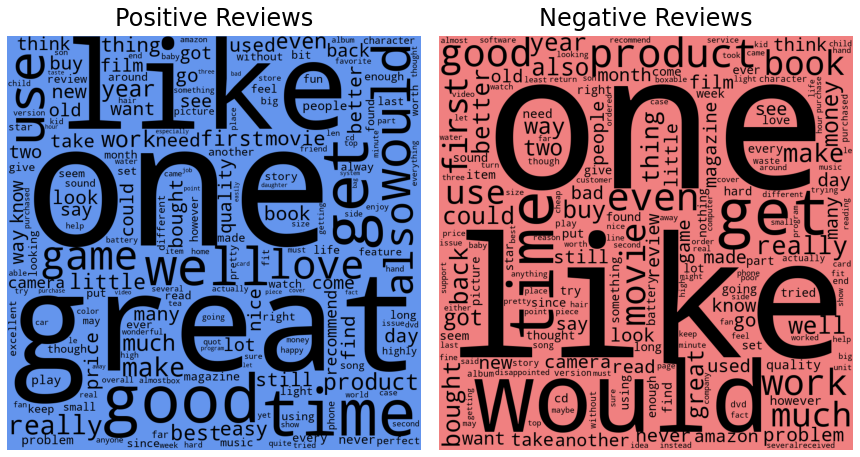

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(positive_wordcloud_desc)
ax1.axis("off")
ax1.set_title("Positive Reviews", fontsize=24, pad=10)

ax2.imshow(negative_wordcloud_desc)
ax2.axis("off")
ax2.set_title("Negative Reviews", fontsize=24, pad=10)

fig.tight_layout(pad=0)

#plt.savefig('../images/description_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def NaiveBayes_withoutBigrams(df):
    # Import module
    # Create an instance of TfidfVectorizer
    vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1), max_features=1000)
    # Fit to the data and transform to tf-idf
    vectorizer.fit_transform(df['clean_Review'])
    vector = vectorizer.transform(df['clean_Review'])
    cc = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names(), index= df.index)
    cc.reset_index(drop=True, inplace=True)
    labels = df['label']
    df_m1= pd.concat([cc,labels], axis=1)
    df_m1 = df_m1[np.isfinite(df_m1).all(1)]
    df_m1.dropna(inplace=True)
    NaiveBayesClassification(df_m1)
    
def NaiveBayes_withBigrams(df):
    # Import module
    # Create an instance of TfidfVectorizer
    vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,2), max_features=1000)
    # Fit to the data and transform to tf-idf
    vectorizer.fit_transform(df['clean_Review'])
    vector = vectorizer.transform(df['clean_Review'])
    cc = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names(), index= df.index)
    cc.reset_index(drop=True, inplace=True)
    labels = df['label']
    df_m1= pd.concat([cc,labels], axis=1)
    df_m1 = df_m1[np.isfinite(df_m1).all(1)]
    df_m1.dropna(inplace=True)
    NaiveBayesClassification(df_m1)


def NaiveBayesClassification(df):

    X = df_m1.drop(['label'], axis=1)
    Y = df_m1[['label']]
    X1_train,X1_test,y1_train,y1_test = train_test_split(X, Y, test_size=0.3, random_state=25,shuffle=True)
    names = ['Naive bayes Algorithm']
    scores = [] #list variable to hold classification scores
    classifiers = [
        GaussianNB()
        ]
    for classifier in classifiers:
        pipeline = Pipeline(steps=[('classifier', classifier)])
        pipeline.fit(X1_train, y1_train) 

    y_pred = pipeline.predict(X1_test)
    print("Accuracy\n", metrics.accuracy_score(y1_test, y_pred))
    print("classification report:\n",metrics.classification_report(y1_test, y_pred))
    print("confussion matrix:\n",metrics.confusion_matrix(y1_test, y_pred))
    print("\n")
    print("--------ROC AUC Curve Graph------------\n")
    precision, recall, _ = precision_recall_curve(y1_test, y_pred)
    pr_auc = auc(recall, precision)
    print("Precision-Recall AUC: %.2f \n" % pr_auc)
    # ROC AUC
    fpr, tpr, _ = roc_curve(y1_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print ("ROC AUC: %.2f\n" % roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print("----------------------------*******************************END*****************************---------------------------")

Accuracy
 0.7670356278104462
classification report:
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.74      4970
         1.0       0.81      0.77      0.79      6594

    accuracy                           0.77     11564
   macro avg       0.76      0.77      0.76     11564
weighted avg       0.77      0.77      0.77     11564

confussion matrix:
 [[3788 1182]
 [1512 5082]]


--------ROC AUC Curve Graph------------

Precision-Recall AUC: 0.86 

ROC AUC: 0.77



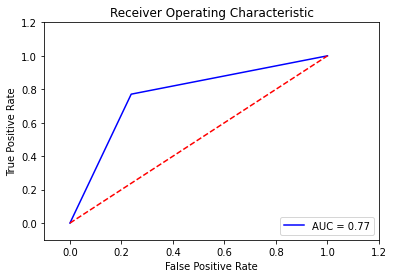

----------------------------*******************************END*****************************---------------------------
Accuracy
 0.7670356278104462
classification report:
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.74      4970
         1.0       0.81      0.77      0.79      6594

    accuracy                           0.77     11564
   macro avg       0.76      0.77      0.76     11564
weighted avg       0.77      0.77      0.77     11564

confussion matrix:
 [[3788 1182]
 [1512 5082]]


--------ROC AUC Curve Graph------------

Precision-Recall AUC: 0.86 

ROC AUC: 0.77



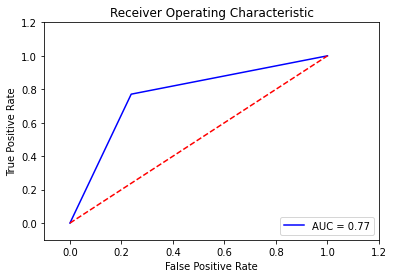

----------------------------*******************************END*****************************---------------------------


In [ ]:
NaiveBayes_withoutBigrams(df)
NaiveBayes_withBigrams(df)

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 1), max_features=1000)
# vectorizer1 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,2}', ngram_range=(1,3), max_features=1000)
# Fit to the data and transform to tf-idf
vectorizer.fit_transform(df['clean_Review'])
vector = vectorizer.transform(df['clean_Review'])
cc = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names(), index= df.index)
cc.reset_index(drop=True, inplace=True)

labels = df['label']
df_m1= pd.concat([cc,labels], axis=1)
df_m1 = df_m1[np.isfinite(df_m1).all(1)]
df_m1.dropna(inplace=True)

X = df_m1.drop(['label'], axis=1)
Y = df_m1[['label']]
X1_train,X1_test,y1_train,y1_test = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True)
names = ['Support Vector Machine']
scores = [] #list variable to hold classification scores
classifiers = [
    GaussianNB()
    ]
for classifier in classifiers:
    pipeline = Pipeline(steps=[('classifier', classifier)])
    pipeline.fit(X1_train, y1_train) 

y_pred = pipeline.predict(X1_test)
print("classification report:\n",metrics.classification_report(y1_test, y_pred))
print("confussion matrix:\n",metrics.confusion_matrix(y1_test, y_pred))

classification report:
               precision    recall  f1-score   support

         0.0       0.71      0.75      0.73      4979
         1.0       0.80      0.77      0.78      6585

    accuracy                           0.76     11564
   macro avg       0.76      0.76      0.76     11564
weighted avg       0.76      0.76      0.76     11564

confussion matrix:
 [[3739 1240]
 [1545 5040]]


In [ ]:
print("Accuracy", metrics.accuracy_score(y1_test, y_pred))

Accuracy 0.7008820477343479


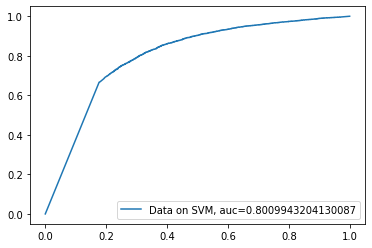

In [ ]:
y_pred_proba = pipeline.predict_proba(X1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)
plt.plot(fpr,tpr,label="Data on SVM, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Precision-Recall AUC: 0.85
ROC AUC: 0.76


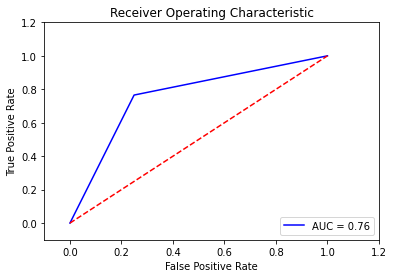

In [ ]:
precision, recall, _ = precision_recall_curve(y1_test, y_pred)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC: %.2f" % pr_auc)
# ROC AUC
fpr, tpr, _ = roc_curve(y1_test, y_pred)
roc_auc = auc(fpr, tpr)
print ("ROC AUC: %.2f" % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

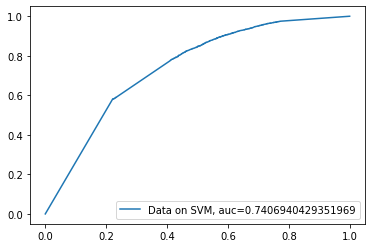

In [ ]:
y_pred_proba = pipeline.predict_proba(X1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)
plt.plot(fpr,tpr,label="Data on SVM, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y1_test, y_pred)
plt.show()

IndexError: ignored

In [ ]:
Algorithm_Modeling(df)

classification report:
               precision    recall  f1-score   support

         0.0       0.67      0.73      0.70      4970
         1.0       0.78      0.73      0.75      6594

    accuracy                           0.73     11564
   macro avg       0.72      0.73      0.73     11564
weighted avg       0.73      0.73      0.73     11564

confussion matrix:
 [[3638 1332]
 [1811 4783]]


In [ ]:
def Algorithm_Modeling(df):
    # Import module
    # Create an instance of TfidfVectorizer
    vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=1000)
   # vectorizer1 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,2}', ngram_range=(1,3), max_features=1000)
    # Fit to the data and transform to tf-idf
    vectorizer.fit_transform(df['clean_Review'])
    vector = vectorizer.transform(df['clean_Review'])
    cc = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names(), index= df.index)
    cc.reset_index(drop=True, inplace=True)
    
    labels = df['label']
    df_m1= pd.concat([cc,labels], axis=1)
    df_m1 = df_m1[np.isfinite(df_m1).all(1)]
    df_m1.dropna(inplace=True)

    X = df_m1.drop(['label'], axis=1)
    Y = df_m1[['label']]
    X1_train,X1_test,y1_train,y1_test = train_test_split(X, Y, test_size=0.3, random_state=25,shuffle=True)
    names = ['Support Vector Machine']
    scores = [] #list variable to hold classification scores
    classifiers = [
        GaussianNB()
        ]
    for classifier in classifiers:
        pipeline = Pipeline(steps=[('classifier', classifier)])
        pipeline.fit(X1_train, y1_train) 

    y_pred = pipeline.predict(X1_test)
    print("classification report:\n",metrics.classification_report(y1_test, y_pred))
    print("confussion matrix:\n",metrics.confusion_matrix(y1_test, y_pred))


In [ ]:
Algorithm_Modeling(df)

classification report:
               precision    recall  f1-score   support

         0.0       0.67      0.58      0.62      4970
         1.0       0.71      0.78      0.75      6594

    accuracy                           0.70     11564
   macro avg       0.69      0.68      0.68     11564
weighted avg       0.69      0.70      0.69     11564

confussion matrix:
 [[2902 2068]
 [1438 5156]]


In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,2), max_features=1000)
# vectorizer1 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,2}', ngram_range=(1,3), max_features=1000)
# Fit to the data and transform to tf-idf
vectorizer.fit_transform(df['clean_Review'])
vector = vectorizer.transform(df['clean_Review'])
cc = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names(), index= df.index)
cc.reset_index(drop=True, inplace=True)

In [ ]:
cc.head(10)

aa battery  able find  able get  ...  young child  yr old  zero star
0         0.0   0.000000       0.0  ...          0.0     0.0        0.0
1         0.0   0.000000       0.0  ...          0.0     0.0        0.0
2         0.0   0.000000       0.0  ...          0.0     0.0        0.0
3         0.0   0.795417       0.0  ...          0.0     0.0        0.0
4         0.0   0.000000       0.0  ...          0.0     0.0        0.0
5         0.0   0.000000       0.0  ...          0.0     0.0        0.0
6         0.0   0.000000       0.0  ...          0.0     0.0        0.0
7         0.0   0.000000       0.0  ...          0.0     0.0        0.0
8         0.0   0.000000       0.0  ...          0.0     0.0        0.0
9         0.0   0.000000       0.0  ...          0.0     0.0        0.0

[10 rows x 1000 columns]

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=1000)
vectorizer.fit_transform(df['clean_Review'])
vector = vectorizer.transform(df['clean_Review'])
cc = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names(), index= df.index)
cc.reset_index(drop=True, inplace=True)

In [ ]:
cc.head(15)

ability      able  absolutely  accurate  ...  yes  yet  young      zoom
0       0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
1       0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
2       0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
3       0.0  0.201345         0.0       0.0  ...  0.0  0.0    0.0  0.000000
4       0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.362719
5       0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
6       0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
7       0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
8       0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
9       0.0  0.219129         0.0       0.0  ...  0.0  0.0    0.0  0.000000
10      0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
11      0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
12      0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
13      0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000
14      0.0  0.000000         0.0       0.0  ...  0.0  0.0    0.0  0.000000

[15 rows x 1000 columns]

In [ ]:
import pandas as pd
import collections
import nltk.classify.util
import nltk.metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#import re
import itertools
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import matplotlib.pyplot as plt

In [ ]:
finalpos = df.loc[df['label'] == 1]
finalneg = df.loc[df['label'] == 0]

In [ ]:
negfeats = [((review),'neg') for review in finalneg]
posfeats = [((review), 'pos') for review in finalpos]

negcutoff = int(len(negfeats)*0.5)
poscutoff = int(len(posfeats)*0.5)

traindata = negfeats[:negcutoff] + posfeats[:poscutoff]
testdata = negfeats[negcutoff:] + posfeats[poscutoff:]

classifier = NaiveBayesClassifier.train(traindata)
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
y_true, y_score = [], []
for i, (feats, label) in enumerate(testdata):
        refsets[label].add(i)
        observed = classifier.classify(feats)
        y_true.append(labeltoint(label))
        y_score.append(labeltoint(observed))
        testsets[observed].add(i)

print('accuracy:', nltk.classify.util.accuracy(classifier, testdata))

AttributeError: ignored

accuracy: 0.7439941887614798
Precision-Recall AUC: 0.85
ROC AUC: 0.75


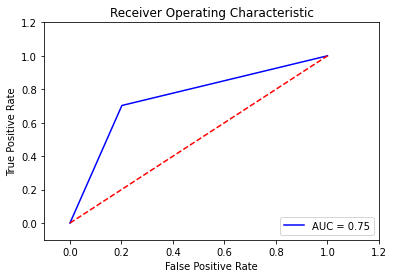

Most Informative Features
        ('piec', 'junk') = True              neg : pos    =     60.5 : 1.0
         ('two', 'star') = True              neg : pos    =     48.2 : 1.0
      ('worth', 'everi') = True              pos : neg    =     37.5 : 1.0
         ('terribl', '') = True              neg : pos    =     34.9 : 1.0
     ('cheapli', 'made') = True              neg : pos    =     31.4 : 1.0
            ('', 'wast') = True              neg : pos    =     28.9 : 1.0
       ('also', 'great') = True              pos : neg    =     28.4 : 1.0
        ('great', 'buy') = True              pos : neg    =     28.4 : 1.0
    ('return', 'amazon') = True              neg : pos    =     27.8 : 1.0
                stroller = True              pos : neg    =     27.6 : 1.0


In [ ]:
import pandas as pd
import collections
import nltk.classify.util
import nltk.metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#import re
import itertools
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import matplotlib.pyplot as plt

stop_words=set(stopwords.words('english'))
#my_set=set(line.strip() for line in open('stopwords.txt'))

def labeltoint(label):
    if label == 'pos':
        return 1
    else:
        return 0
#remove symbols,Punctuation and break tags
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")
def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    string.replace('[^\w\s]','')
    return re.sub(strip_special_chars, "", string.lower())

def bigrams(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    words=words.split(" ")
    words = [w for w in words if not w in stop_words]
   # words = [w for w in words if not w in my_set]
    porter = PorterStemmer()
    words = [porter.stem(word) for word in words]
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return dict([(ngram, True) for ngram in itertools.chain(words, bigrams)])
classifier=None
def naiveBaseClassifier(featx):
  #pd.read_csv('gdrive/My Drive/posReview.csv')
    posdata=pd.read_csv(r'gdrive/My Drive/posReview.csv', sep=',')
    negdata=pd.read_csv(r'gdrive/My Drive/negReview.csv', sep=',')
    poslist=posdata["Review"].tolist()
    neglist=negdata["Review"].tolist()
    neglist=neglist[0:12248]+neglist[12250:]
    finalpos=[]
    finalneg=[]
    for item in poslist:
        item1=cleanSentences(item)
        finalpos.append(item1)
    for item in neglist:
        item1=cleanSentences(item)
        finalneg.append(item1)
    negfeats = [(featx(review),'neg') for review in finalneg]
    posfeats = [(featx(review), 'pos') for review in finalpos]

    negcutoff = int(len(negfeats)*0.5)
    poscutoff = int(len(posfeats)*0.5)

    traindata = negfeats[:negcutoff] + posfeats[:poscutoff]
    testdata = negfeats[negcutoff:] + posfeats[poscutoff:]

    classifier = NaiveBayesClassifier.train(traindata)
    refsets = collections.defaultdict(set)
    testsets = collections.defaultdict(set)
    y_true, y_score = [], []
    for i, (feats, label) in enumerate(testdata):
            refsets[label].add(i)
            observed = classifier.classify(feats)
            y_true.append(labeltoint(label))
            y_score.append(labeltoint(observed))
            testsets[observed].add(i)

    print('accuracy:', nltk.classify.util.accuracy(classifier, testdata))
    # Precision-Recall AUC
    precision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)
    pr_auc = auc(recall, precision)
    print("Precision-Recall AUC: %.2f" % pr_auc)
    # ROC AUC
    fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print ("ROC AUC: %.2f" % roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    #classifier.show_most_informative_features()

naiveBaseClassifier(bigrams)

In [ ]:
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

    string = string.lower().replace("<br />", " ")
    string.replace('[^\w\s]','')
    return re.sub(strip_special_chars, "", string.lower())


    

In [ ]:
def bigrams(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    words=words.split(" ")
    words = [w for w in words if not w in stop_words]
   # words = [w for w in words if not w in my_set]
    porter = PorterStemmer()
    words = [porter.stem(word) for word in words]
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    print(dict([(ngram, True) for ngram in itertools.chain(words, bigrams)]))

df["clean_Review1"] = df["clean_Review"].map(lambda x: bigrams(x))
bigrams(df.clean_Review)

Streaming output truncated to the last 5000 lines.
{'': True, 'instal': True, 'softwar': True, 'window': True, 'xp': True, 'system': True, 'shut': True, 'dread': True, 'blue': True, 'screen': True, 'death': True, 'still': True, 'tri': True, 'return': True, 'former': True, 'useabl': True, 'state': True, 'bewar': True, ('blue', 'screen'): True, ('dread', 'blue'): True, ('former', 'useabl'): True, ('instal', 'softwar'): True, ('screen', 'death'): True, ('shut', 'dread'): True, ('softwar', 'window'): True, ('state', 'bewar'): True, ('still', 'tri'): True, ('tri', 'return'): True, ('useabl', 'state'): True, ('window', 'xp'): True, ('return', 'system'): True, ('system', 'former'): True, ('system', 'shut'): True, ('xp', 'system'): True, ('', ''): True, ('', 'instal'): True, ('', 'still'): True, ('death', ''): True}
{'': True, 'work': True, 'mac': True, 'like': True, 'say': True, 'lous': True, 'machin': True, 'worth': True, ('like', 'say'): True, ('lous', 'machin'): True, ('mac', 'like'): True

In [ ]:
df.head()

label                                       clean_Review
0      1  good looking kick kickin old school like comfo...
1      1         sunglass right   little crooked still cool
2      1      see difference bodysuits expensive one fit...
3      1  nice basic clothing   think size fine   really...
4      1    love sock fit great month old daughter thick...

In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.utils.np_utils import to_categorical

import re

In [ ]:
tokenizer = Tokenizer(num_words=1500, split=' ')

tokenizer.fit_on_texts(df['clean_Review'].values)

X = tokenizer.texts_to_sequences(df['clean_Review'])
X = pad_sequences(X)

In [ ]:
embed_dim = 128

lstm_out = 196
vocabSize = 1000
model = Sequential()

model.add(Embedding(vocabSize, embed_dim,input_length = 28))

model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))

In [ ]:
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
y = df.label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)

In [ ]:
model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs = 2, batch_size=32)

Epoch 1/2


ValueError: ignored

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=1000)
# vectorizer1 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,2}', ngram_range=(1,3), max_features=1000)
# Fit to the data and transform to tf-idf
vectorizer.fit_transform(df['clean_Review'])
vector = vectorizer.transform(df['clean_Review'])
cc = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names(), index= df.index)
cc.reset_index(drop=True, inplace=True)

labels = df['label']
df_m1= pd.concat([cc,labels], axis=1)
df_m1 = df_m1[np.isfinite(df_m1).all(1)]
df_m1.dropna(inplace=True)

X = df_m1.drop(['label'], axis=1)
Y = df_m1[['label']]
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=25,shuffle=True)

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
vocabulary_size = 5000
max_words = 1000
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

RuntimeError: ignored

In [ ]:
train_set = 45000
max_len_text = 2000

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['clean_Review'])
vector = tokenizer.texts_to_sequences(df['clean_Review'])

In [ ]:
train_data = np.array(vector)[:train_set]
train_label = (np.array(df['label'])[:train_set])
test_data = np.array(vector)[train_set:]
test_label = (np.array(df['label'])[train_set:])

In [ ]:
padded_train = pad_sequences(train_data, maxlen=max_len_text)
padded_test = pad_sequences(test_data, maxlen=max_len_text)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(13000, 16, input_length=max_len_text))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.2)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2000, 16)          208000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 249,601
Trainable params: 249,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(padded_train, train_label, epochs=2, validation_data=(padded_test, test_label))

Epoch 1/2
1205/1205 [==============================] - 2824s 2s/step - loss: 0.3840 - accuracy: 0.8323
Epoch 2/2
1205/1205 [==============================] - 2907s 2s/step - loss: 0.2936 - accuracy: 0.8808


In [ ]:
train_data = np.array(vector)[:train_set]
train_label = (np.array(df['label'])[:train_set])
test_data = np.array(vector)[train_set:]
test_label = (np.array(df['label'])[train_set:])

In [ ]:
y_pred = model.predict_classes(train_label)
print("Accuarcy: {}".format(round(accuracy_score(test_label, y_pred)*100,2)))

ValueError: ignored

KeyError: ignored

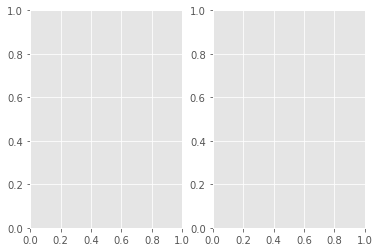

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):    
    epochs = [i for i in range(20)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,5)
    epochs = range(1, len(train_acc) + 1)

    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
    ax[0].set_title('Training & Testing Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
    ax[1].set_title('Training & Testing Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    plt.show()

plot_history(history)

In [ ]:
df.head()

Review  ...                                       clean_Review
0  good looking kicks if your kickin it old schoo...  ...  good looking kick kickin old school like comfo...
1  these sunglasses are all right. they were a li...  ...         sunglass right   little crooked still cool
2  i don't see the difference between these bodys...  ...      see difference bodysuits expensive one fit...
3  very nice basic clothing.  i think the size is...  ...  nice basic clothing   think size fine   really...
4  i love these socks. they fit great (my 15 mont...  ...    love sock fit great month old daughter thick...

[5 rows x 3 columns]

In [ ]:
voc_size = 5000
onehot_lemmatized_text = [one_hot(word, voc_size) for word in df.clean_Review]
print(len(onehot_lemmatized_text))
onehot_lemmatized_text[0]

38547


[4825,
 1318,
 1556,
 3325,
 2340,
 3215,
 451,
 3092,
 3029,
 866,
 1916,
 2903,
 2312,
 208,
 304,
 4209,
 956]

In [ ]:
sent_length = 400
embedded_text = pad_sequences(onehot_lemmatized_text, padding='pre', maxlen=sent_length)
print(embedded_text)

[[   0    0    0 ...  304 4209  956]
 [   0    0    0 ... 3187 3847 4602]
 [   0    0    0 ... 3396 4976 1952]
 ...
 [   0    0    0 ... 4704 3427 4603]
 [   0    0    0 ... 4327 2941 2153]
 [   0    0    0 ... 1802 2638 1264]]


In [ ]:
embedding_vector_features = 600
model2 = Sequential()
model2.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 600)          3000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               280400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 3,280,501
Trainable params: 3,280,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_final = np.array(embedded_text)
y_final = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')

In [ ]:
history = model2.fit(X_train, y_train,
                    epochs=2,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=3)
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
y_pred = model2.predict_classes(X_test)
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):    
    epochs = [i for i in range(20)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,5)
    epochs = range(1, len(train_acc) + 1)

    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
    ax[0].set_title('Training & Testing Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
    ax[1].set_title('Training & Testing Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    plt.show()

plot_history(history)